In [1]:
#Loading the required libraries

import pandas as pd
import numpy as np

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

from sklearn import tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('bank.txt')

In [3]:
data=pd.read_csv('bank.txt',sep=';')

In [61]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,active,get
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,na
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1,na
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,1,na
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1,na
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,1,na
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,1,na
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,1,na
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,1,na


In [17]:
data1=data[['job','age']]
data1

,job,age
0,unemployed,30
1,services,33
2,management,35
3,management,30
4,blue-collar,59
...,...,...
4516,services,33
4517,self-employed,57
4518,technician,57
4519,blue-collar,28


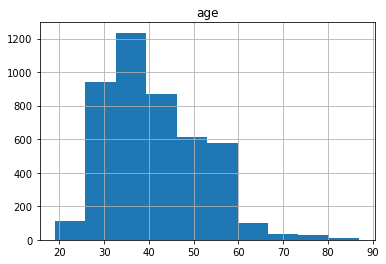

In [24]:
col=data[['age']].hist()

In [30]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
active       0
dtype: int64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
 17  active     4521 non-null   int64 
dtypes: int64(8), object(10)
memory usage: 635.9+ KB


In [11]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [34]:
data[['job','education']]

AttributeError: 'DataFrame' object has no attribute 'Bar'

In [38]:
data['get']='na'
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,active,get
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1,na
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1,na
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,1,na
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1,na
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,1,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no,1,na
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no,1,na
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no,1,na
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no,1,na


In [14]:
data.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [82]:
data_c=data.select_dtypes(include='object')

In [83]:
data_c

,job,marital,education,default,housing,loan,month,y
0,unemployed,married,primary,no,no,no,oct,no
1,services,married,secondary,no,yes,yes,may,no
2,management,single,tertiary,no,yes,no,apr,no
3,management,married,tertiary,no,yes,yes,jun,no
4,blue-collar,married,secondary,no,yes,no,may,no
...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,jul,no
4517,self-employed,married,tertiary,yes,yes,yes,may,no
4518,technician,married,secondary,no,no,no,aug,no
4519,blue-collar,married,secondary,no,no,no,feb,no


In [67]:
data.replace('unknown',np.nan, inplace = True)

In [88]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [80]:
data=data.dropna(axis=0)

In [81]:
data

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,y
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,30,jul,329,5,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,9,may,153,1,no
4518,57,technician,married,secondary,no,295,no,no,19,aug,151,11,no
4519,28,blue-collar,married,secondary,no,1137,no,no,6,feb,129,4,no


In [76]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,4521.000000,4483,4521,4334,4521,4521.000000,4521,4521,3197,4521.000000,4521,4521.000000,4521.000000,4521
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,NaN


In [68]:
data.drop('previous', axis=1, inplace=True)

In [77]:
data.drop('contact', axis=1, inplace=True)

In [69]:
data.drop('pdays', axis=1, inplace=True)

In [70]:
data.drop('poutcome', axis=1, inplace=True)

In [55]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,32,technician,single,secondary,no,309,yes,yes,cellular,16,apr,346,1,no
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,yes
4514,38,blue-collar,married,secondary,no,1205,yes,no,cellular,20,apr,45,4,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,no


In [84]:
data_c_col=data_c.columns

In [85]:
data_c_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'month',
       'y'],
      dtype='object')

In [86]:
data_n=data.select_dtypes(exclude='object')

In [87]:
data_n.dtypes

age         int64
balance     int64
day         int64
duration    int64
campaign    int64
dtype: object

In [63]:
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
count,764.000000,764,764,764,764,764.000000,764,764,764,764.000000,764,764.000000,764.000000,764
unique,NaN,11,3,3,2,NaN,2,2,2,NaN,12,NaN,NaN,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,no
freq,NaN,177,456,407,759,NaN,489,672,697,NaN,253,NaN,NaN,593
mean,41.277487,NaN,NaN,NaN,NaN,1600.434555,NaN,NaN,NaN,14.585079,NaN,273.887435,2.037958,NaN
std,11.331024,NaN,NaN,NaN,NaN,2980.860786,NaN,NaN,NaN,7.814483,NaN,246.587595,1.590395,NaN
min,20.000000,NaN,NaN,NaN,NaN,-1400.000000,NaN,NaN,NaN,1.000000,NaN,5.000000,1.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,141.250000,NaN,NaN,NaN,7.750000,NaN,119.750000,1.000000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,624.500000,NaN,NaN,NaN,14.000000,NaN,203.000000,1.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1648.750000,NaN,NaN,NaN,19.250000,NaN,332.000000,2.000000,NaN


In [90]:
data = pd.get_dummies(columns=data_c_col, data=data, prefix=data_c_col, prefix_sep="_", drop_first=True)
print (data.columns, data.shape)

Index(['age', 'balance', 'day', 'duration', 'campaign', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'default_yes',
       'housing_yes', 'loan_yes', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'y_yes'],
      dtype='object') (4311, 34)


In [91]:
data

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,30,1787,19,79,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,33,4789,11,220,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35,1350,16,185,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,59,0,5,226,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4517,57,-3313,9,153,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4518,57,295,19,151,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,28,1137,6,129,4,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [94]:
data.y_yes.value_counts()

0    3813
1     498
Name: y_yes, dtype: int64

In [95]:
data.y_yes.value_counts(normalize=True)

0    0.884482
1    0.115518
Name: y_yes, dtype: float64

In [96]:

X, y = data.loc[:,data.columns!='y_yes'].values, data.loc[:,'y_yes'].values

print(type(X))

#num_array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

<class 'numpy.ndarray'>


In [97]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [98]:
clf

DecisionTreeClassifier()

In [99]:
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

In [100]:
test=data.columns.to_list()

In [101]:
test

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'y_yes']

In [102]:
test=['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep']

In [103]:
train_x=pd.DataFrame(X_train,columns=test)

In [104]:
check_training_data=pd.DataFrame({'true_values':y_train,'model_predicted_values':train_pred})

In [105]:
check_training_data

,true_values,model_predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
3228,0,0
3229,1,1
3230,0,0
3231,0,0


In [106]:
test_x=pd.DataFrame(X_test,columns=test)

In [107]:
test_x

,age,balance,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,44,2984,15,770,2,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,31,26965,21,654,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,75,3771,15,185,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,44,2523,29,1236,2,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,60,26,196,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,26,455,29,240,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1074,28,43,19,190,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1075,37,712,18,291,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1076,32,71,21,221,8,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [108]:
check_test_data=pd.DataFrame({'true_values':y_test,'model_predicted_values':test_pred})

In [109]:
check_test_data

,true_values,model_predicted_values
0,0,0
1,1,0
2,1,1
3,0,1
4,0,0
...,...,...
1073,0,0
1074,0,0
1075,0,0
1076,0,0


In [111]:
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

In [112]:
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Train TNR:  1.0
Train TPR:  1.0
Train Accuracy:  1.0


In [113]:
Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9037037037037037
Test TPR:  0.42105263157894735
Test Accuracy:  0.8441558441558441


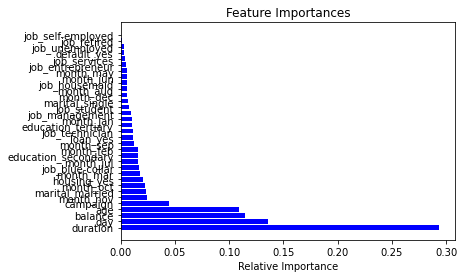

In [114]:
clf.feature_importances_
features = data.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
pd.DataFrame([data.columns[indices],np.sort(importances)[::-1]])

#Ploting the Feature importances
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [115]:

clf = tree.DecisionTreeClassifier(max_depth=15)
clf = clf.fit(X_train, y_train)

#Predicting on Train and Test
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

#Getting evaluation metrics and evaluating model performance
confusion_matrix_test = confusion_matrix(y_test, test_pred)
confusion_matrix_train = confusion_matrix(y_train, train_pred)

print(confusion_matrix_train)
print(confusion_matrix_test)

#Calculate Accuracy, True Positive Rate and True Negative Rates
Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
TNR_Train= confusion_matrix_train[0,0]/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1])
TPR_Train= confusion_matrix_train[1,1]/(confusion_matrix_train[1,0]+confusion_matrix_train[1,1])

print("Train TNR: ",TNR_Train)
print("Train TPR: ",TPR_Train)
print("Train Accuracy: ",Accuracy_Train)

Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
TNR_Test= confusion_matrix_test[0,0]/(confusion_matrix_test[0,0] +confusion_matrix_test[0,1])
TPR_Test= confusion_matrix_test[1,1]/(confusion_matrix_test[1,0] +confusion_matrix_test[1,1])

print("Test TNR: ",TNR_Test)
print("Test TPR: ",TPR_Test)
print("Test Accuracy: ",Accuracy_Test) 

[[2868    0]
 [  49  316]]
[[873  72]
 [ 84  49]]
Train TNR:  1.0
Train TPR:  0.8657534246575342
Train Accuracy:  0.9848437983297247
Test TNR:  0.9238095238095239
Test TPR:  0.3684210526315789
Test Accuracy:  0.8552875695732839


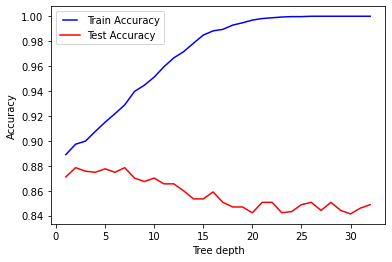

In [116]:
#How do we arrive at the best tree depth for this data?
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)

    train_pred = dt.predict(X_train)
    confusion_matrix_train = confusion_matrix(y_train, train_pred)
    Accuracy_Train=(confusion_matrix_train[0,0]+confusion_matrix_train[1,1])/(confusion_matrix_train[0,0]+confusion_matrix_train[0,1]+confusion_matrix_train[1,0]+confusion_matrix_train[1,1])
    train_results.append(Accuracy_Train)

    test_pred = dt.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred)
    Accuracy_Test=(confusion_matrix_test[0,0]+confusion_matrix_test[1,1])/(confusion_matrix_test[0,0]+confusion_matrix_test[0,1]+confusion_matrix_test[1,0]+confusion_matrix_test[1,1])
    test_results.append(Accuracy_Test)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results,'b', label='Train Accuracy')
line2, = plt.plot(max_depths, test_results,'r', label='Test Accuracy')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()

In [117]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
!conda install --yes python-graphviz
!conda install --yes graphviz


Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
Examining conflict for ipython prompt-toolkit astropy wcwidth anaconda prompt_- 

In [41]:
pi=4
di=7

In [42]:
pi

4

In [43]:
a=4
b=5
a*b

20

In [44]:
7*8

56

In [46]:
16/3

5.333333333333333

In [53]:
(16/3-7/3*2)

0.6666666666666661

In [54]:
import random

In [55]:
random.random()

0.3482971708493978

In [56]:
random.random()

0.5943956925232885

In [57]:
4/7

0.5714285714285714

In [58]:
4//7

0

In [59]:
import seaborn as sns

<AxesSubplot:>

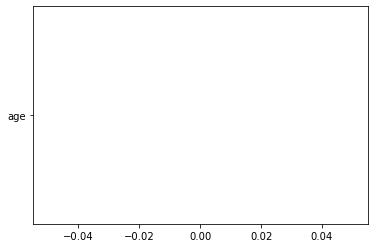

In [64]:
sns.lineplot(data='age')

In [67]:
data['age'].lineplot()

AttributeError: 'Series' object has no attribute 'lineplot'

<AxesSubplot:xlabel='job', ylabel='age'>

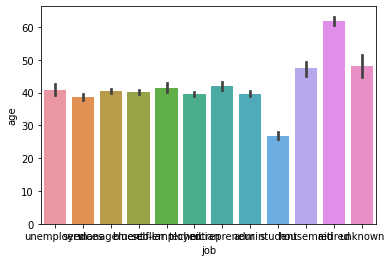

In [68]:
sns.barplot(x=data['job'],y=data['age'])

<AxesSubplot:>

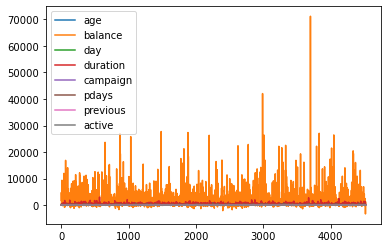

In [70]:
data.plot()

<AxesSubplot:xlabel='job', ylabel='age'>

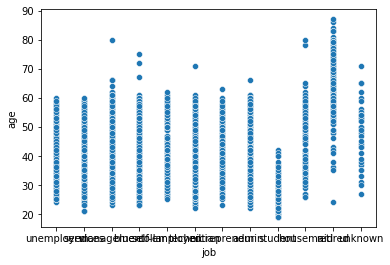

In [75]:
sns.scatterplot(x=data['job'],y=data['age'])

<AxesSubplot:ylabel='Density'>

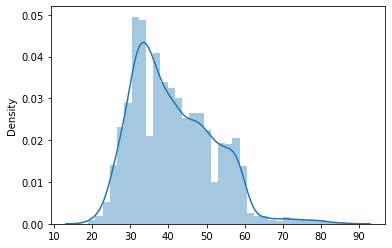

In [78]:
sns.distplot(x=data['age'])

No handles with labels found to put in legend.


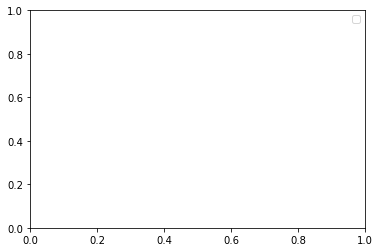

In [79]:
plt.legend()